In [6]:
# Motive is to observe properties of different stocks from same/different sectors

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import datetime
import numpy as np

In [7]:
# Period of stock data comparison ( economy crisis 2008 in specific)
start_date = '2007-01-01'
end_date = '2010-12-31'

#Stocks from Healthcare sector, Health Care Equipment sub industry
#(ABT) stock symbol of a healthcare sector in SP500 that has been through the 2008 recession
#(ABMD) another stock symbol of a healthcare sector in SP500 that has been through the 2008 recession for comparison
#(A) another stock symbol of a healthcare sector in SP500 that has been through the 2008 recession for comparison

#Stocks from Material sector
#(GLD) a stock symbol of material sector

ABT =data.DataReader('ABT', 'yahoo', start_date, end_date)
ABMD =data.DataReader('ABMD', 'yahoo', start_date, end_date)
A =data.DataReader('A', 'yahoo', start_date, end_date)
GLD =data.DataReader('GLD', 'yahoo', start_date, end_date)

In [8]:
symbol_data=[ABT, ABMD, A, GLD]
symbols=['ABT', 'ABMD', 'A', 'GLD']
all_data=pd.concat(symbol_data, keys=symbols, names=['Symbol','Date'])
all_data

High         Low        Open       Close      Volume  \
Symbol Date                                                                     
ABT    2007-01-03   23.745302   23.390249   23.428635   23.495806  11214800.0   
       2007-01-04   24.105152   23.495806   23.538988   23.942020  21185400.0   
       2007-01-05   23.990000   23.639746   23.942020   23.942020  14649800.0   
       2007-01-08   24.052374   23.817272   23.903637   24.028383  12734600.0   
       2007-01-09   24.306667   23.990000   24.061970   24.239496  16969100.0   
       2007-01-10   24.201113   23.990000   24.095556   24.177122  13823800.0   
       2007-01-11   24.460203   24.071566   24.201113   24.157930  12554100.0   
       2007-01-12   24.225101   23.994799   24.023586   24.205910  11189400.0   
       2007-01-16   24.412224   24.172323   24.234697   24.282679  12213200.0   
       2007-01-17   24.757681   24.253889   24.297071   24.733690  16784400.0   
       2007-01-18   25.391016   24.949600   24.949600   25.328642  27157700.0   
       2007-01-19   25.789249   25.501369   25.592531   25.678896  25347200.0   
       2007-01-22   25.650108   25.419804   25.525360   25.582935  14853600.0   
       2007-01-23   25.693291   25.429399   25.477381   25.611725  16214600.0   
       2007-01-24   25.837231   25.371824   25.611725   25.693291  15993500.0   
       2007-01-25   25.669300   25.151115   25.477381   25.232681  18078700.0   
       2007-01-26   25.314247   24.925610   25.285460   25.213490  14243800.0   
       2007-01-29   25.309450   24.714499   24.906418   25.266268  17678400.0   
       2007-01-30   25.534956   25.295055   25.309450   25.520561  13542700.0   
       2007-01-31   25.544552   25.223085   25.309450   25.429399  12249800.0   
       2007-02-01   25.419804   25.059954   25.189501   25.367025  11863900.0   
       2007-02-02   25.429399   25.160711   25.213490   25.271067   9661900.0   
       2007-02-05   25.261471   25.035963   25.141520   25.189501   6987000.0   
       2007-02-06   25.309450   25.050358   25.285460   25.170307   7121900.0   
       2007-02-07   25.251875   25.031166   25.189501   25.165510   7338800.0   
       2007-02-08   25.213490   24.978388   25.141520   25.016771  10063500.0   
       2007-02-09   25.251875   25.016771   25.117531   25.079145   7892000.0   
       2007-02-12   25.323845   25.064753   25.112732   25.295055   9011600.0   
       2007-02-13   25.328642   25.199097   25.256672   25.290258   8092500.0   
       2007-02-14   25.515764   25.271067   25.285460   25.285460  10593900.0   
...                       ...         ...         ...         ...         ...   
GLD    2010-11-18  132.779999  131.550003  131.820007  132.089996  16009400.0   
       2010-11-19  132.350006  131.009995  131.479996  132.199997  14146400.0   
       2010-11-22  133.600006  131.690002  132.130005  133.479996  13093400.0   
       2010-11-23  135.070007  133.460007  133.600006  134.410004  18215200.0   
       2010-11-24  134.699997  133.740005  134.360001  134.179993   8858100.0   
       2010-11-26  133.160004  131.929993  132.380005  133.110001   7822400.0   
       2010-11-29  133.750000  132.330002  133.190002  133.509995  13983800.0   
       2010-11-30  135.750000  134.779999  135.210007  135.419998  17473100.0   
       2010-12-01  136.139999  134.960007  135.710007  135.380005  16831100.0   
       2010-12-02  136.589996  135.149994  135.619995  135.199997  17583800.0   
       2010-12-03  138.110001  136.479996  136.619995  138.070007  16517200.0   
       2010-12-06  139.460007  137.729996  138.139999  139.110001  15640800.0   
       2010-12-07  139.539993  136.460007  139.460007  136.500000  26490400.0   
       2010-12-08  136.289993  133.880005  135.910004  134.789993  23483300.0   
       2010-12-09  136.160004  134.880005  135.690002  135.369995  14157600.0   
       2010-12-10  135.479996  133.949997  134.940002  135.410004  11937900.0   
       2010-12-13  136.639999  135.860001  136.259995  1

In [19]:
all_data_adj_price= all_data[['Adj Close']].reset_index()
all_data_pivoting= all_data_adj_price.pivot('Date', 'Symbol', 'Adj Close')

Text(0.5, 1.0, 'Stock price fluctuation of the listed 4 stocks')

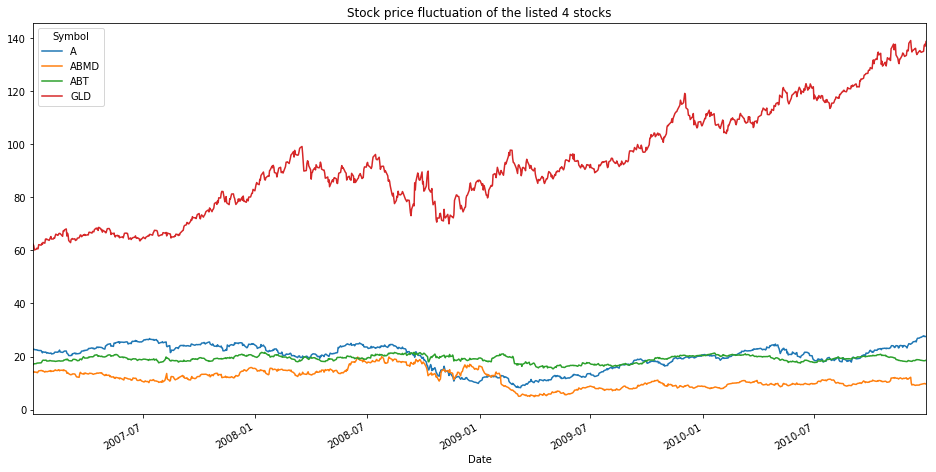

In [21]:
# Plot price of stock throughout the years
all_data_pivoting.plot(figsize=(16,8))
plt.title('Stock price fluctuation of the listed 4 stocks')

Text(0.5, 1.0, 'Trading volume of GLD')

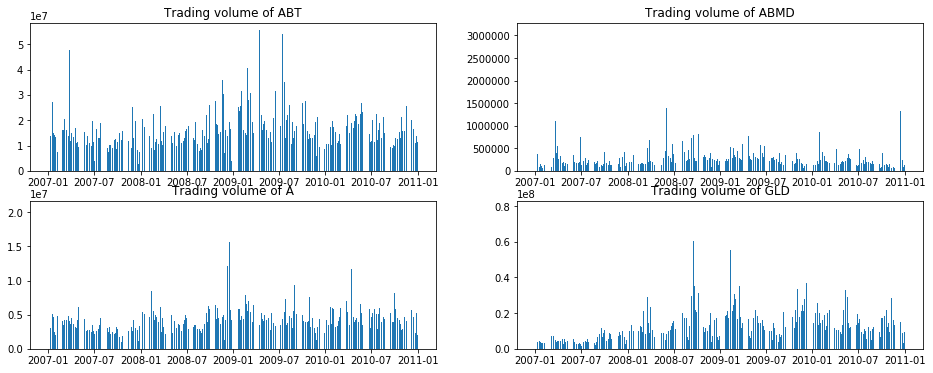

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
ABT_volume= all_data.Volume.loc['ABT']
plt.bar(ABT_volume.index, ABT_volume)
plt.title('Trading volume of ABT')

plt.subplot(2,2,2)
ABMD_volume= all_data.Volume.loc['ABMD']
plt.bar(ABMD_volume.index, ABMD_volume)
plt.title('Trading volume of ABMD')

plt.subplot(2,2,3)
A_volume= all_data.Volume.loc['A']
plt.bar(A_volume.index, A_volume)
plt.title('Trading volume of A')

plt.subplot(2,2,4)
GLD_volume= all_data.Volume.loc['GLD']
plt.bar(GLD_volume.index, GLD_volume)
plt.title('Trading volume of GLD')

# Conclusion
# ABMD trading volume is least among all stock(10^6) , stock less liquid compared to other 3 stocks(10^7)

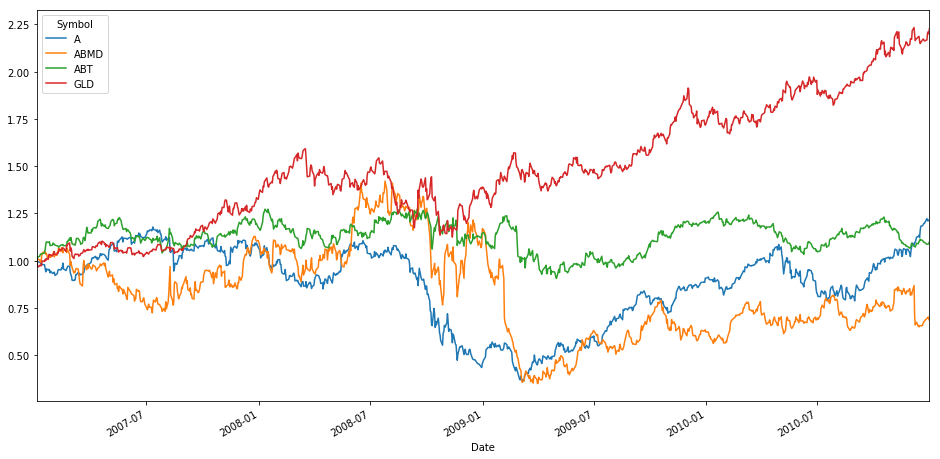

In [33]:
# % change in stock price daily in terms of cumulative returns
daily_price_change= all_data_pivoting.pct_change()
daily_price_change.fillna(0, inplace=True)
daily_cum_return= (1 + daily_price_change).cumprod()
daily_cum_return.plot(figsize=(16,8))

# Conclusion
# ABMD returns seemed to be fluctuating the most, implying higher volatility

Text(0.5, 1.0, 'Histograme of GLD returns')

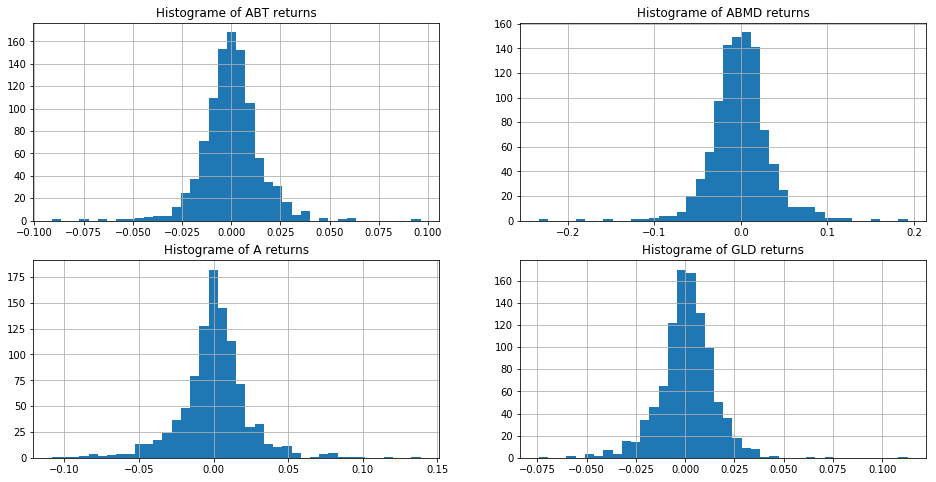

In [37]:
# Plot of histogram of returns(% price change)
ABT_pct_change= daily_price_change['ABT']
ABMD_pct_change= daily_price_change['ABMD']
A_pct_change= daily_price_change['A']
GLD_pct_change= daily_price_change['GLD']

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
ABT_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of ABT returns')

plt.subplot(2,2,2)
ABMD_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of ABMD returns')

plt.subplot(2,2,3)
A_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of A returns')

plt.subplot(2,2,4)
GLD_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of GLD returns')

# Conclusion
# All stock retrns seem normally distribution with mean being approx 0
# Histogram of ABMD has the widest interval, thus considered being more volatile
# Histogram of ABMD has the second widest interval after ABMD
# Histogram of ABt and GLD seem to have approx similar widths, both having smallest width of all four histogram
# This can confirmed by observing 95% CI of stock returns

In [39]:
ABT_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of ABT is (-0.026315, 0.029186)
# Width of CI is 0.055501 (first ranking(smallest) width, better precision)

count    1008.000000
mean        0.000200
std         0.014613
min        -0.091156
2.5%       -0.026315
50%         0.000000
97.5%       0.029186
max         0.096259
Name: ABT, dtype: float64

In [40]:
ABMD_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of ABMD is (-0.060533, 0.075146)
# Width of CI is 0.135679 (fourth ranking in width)

count    1008.000000
mean        0.000196
std         0.033747
min        -0.233776
2.5%       -0.060533
50%         0.000000
97.5%       0.075146
max         0.192876
Name: ABMD, dtype: float64

In [41]:
A_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of A is (-0.050396, 0.049332)
# Width of CI is 0.099728 (third ranking in width)

count    1008.000000
mean        0.000470
std         0.023805
min        -0.108450
2.5%       -0.050396
50%         0.000854
97.5%       0.049332
max         0.138790
Name: A, dtype: float64

In [42]:
GLD_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of GLD is (-0.029987, 0.027157)
# Width of CI is 0.057144 (second ranking width)

count    1008.000000
mean        0.000898
std         0.014393
min        -0.074305
2.5%       -0.029987
50%         0.001144
97.5%       0.027157
max         0.112905
Name: GLD, dtype: float64

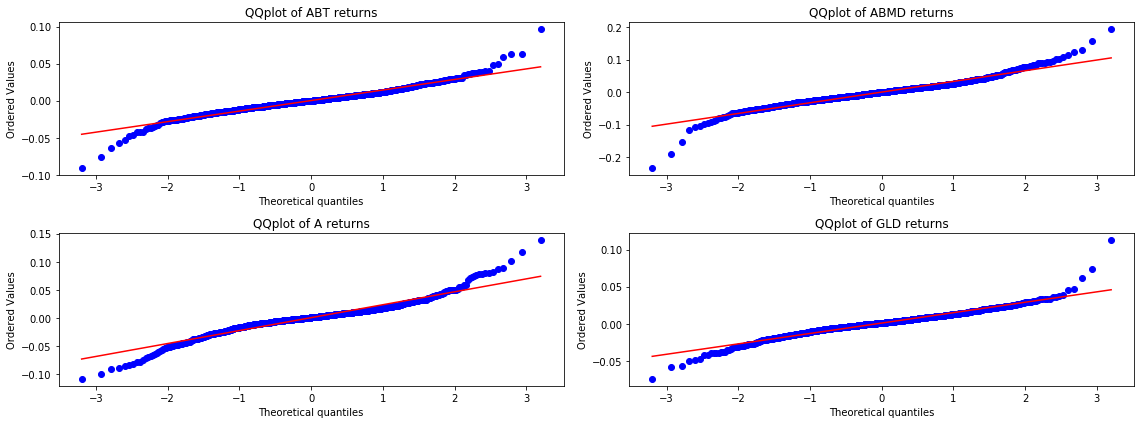

In [45]:
# package required for QQ plot
import scipy.stats as stats

plt.figure(figsize=(16,6))
ax=plt.subplot(2,2,1)
stats.probplot(ABT_pct_change, dist='norm', plot=ax)
plt.title('QQplot of ABT returns')

plt.subplot(2,2,2)
ax=plt.subplot(2,2,2)
stats.probplot(ABMD_pct_change, dist='norm', plot=ax)
plt.title('QQplot of ABMD returns')

plt.subplot(2,2,3)
ax=plt.subplot(2,2,3)
stats.probplot(A_pct_change, dist='norm', plot=ax)
plt.title('QQplot of A returns')

plt.subplot(2,2,4)
ax=plt.subplot(2,2,4)
stats.probplot(GLD_pct_change, dist='norm', plot=ax)
plt.title('QQplot of GLD returns')
plt.tight_layout()